In [ ]:
'''
Conceptual Assignment 3
EEP596 - Advanced Introduction to Machine Learning
Problems 5 & 6

Blake Downey
1.30.2022
'''

In [7]:
# imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [16]:
# Helper functions for number 5

# Calculate the loss
def calc_loss(X_,y_,w_):
    # 1/N * (l2(Xw-y) + lambda*l2(w))
    a = np.sqrt(np.sum(np.power((np.dot(X_,w_) - y_),2))) # root (sum ( (Xw - y)**2 ))
    b = lambda_ * np.sqrt(np.sum(np.power((w_),2))) # lambda * l2 norm of w
    return (a + b)/N

# Calculate gradient
def gradient(X_,y_,w_):
    # 1/N( X^T (Xw - y) + 2 * lambda * w)
    a = (np.dot(X_,w_) - y_) # Xw - y
    b = np.dot(X_.T, a) # X^T (Xw - y)
    ridge = 2*(lambda_)*w_ # 2 * lambda * w
    return (b + ridge)/N

# Analytical Solution
def analytical(X_,y_):
    # (X^TX + lambda*Id)^(-1) * X^T * y
    eye_d = np.identity(d) # create identity matrix of feature size d
    xTx = np.dot(X_.T,X_) + lambda_*eye_d # X^TX + lambda*Id
    inv = np.linalg.inv(xTx) # inverse computation
    inv_xT = np.dot(inv, X_.T) # inv * X^T
    return np.dot(inv_xT, y_) # * y

# Calculate relative error
def rel_err(w_anal, w_conv):
    # l2 norm (conv - anal) / l2 norm (anal)
    numer = np.sqrt(np.sum((w_conv-w_anal)**2))
    denom = np.sqrt(np.sum((w_anal)**2))
    return numer/denom

0th iteration,	  Threshold:  0.30653,	   Loss:  0.43512
1th iteration,	  Threshold:  0.27709,	   Loss:  0.36109
2th iteration,	  Threshold:  0.23240,	   Loss:  0.30359
3th iteration,	  Threshold:  0.18387,	   Loss:  0.25837
4th iteration,	  Threshold:  0.14278,	   Loss:  0.22230
5th iteration,	  Threshold:  0.11161,	   Loss:  0.19316
6th iteration,	  Threshold:  0.08907,	   Loss:  0.16929
7th iteration,	  Threshold:  0.07242,	   Loss:  0.14950
8th iteration,	  Threshold:  0.05979,	   Loss:  0.13289
9th iteration,	  Threshold:  0.05006,	   Loss:  0.11879
10th iteration,	  Threshold:  0.04245,	   Loss:  0.10672
11th iteration,	  Threshold:  0.03639,	   Loss:  0.09628
12th iteration,	  Threshold:  0.03153,	   Loss:  0.08720
13th iteration,	  Threshold:  0.02754,	   Loss:  0.07922
14th iteration,	  Threshold:  0.02423,	   Loss:  0.07219
15th iteration,	  Threshold:  0.02145,	   Loss:  0.06594
16th iteration,	  Threshold:  0.01910,	   Loss:  0.06038
17th iteration,	  Threshold:  0.01709,	  

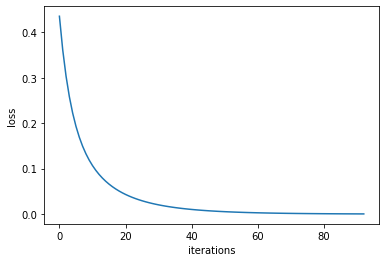

relative error between converged and analytical solution is: 0.0016056618509226518


In [49]:
#5 - Ridge Regression Gradient Descent

# Define dimensions
N = 5000 # samples
d = 1000 # features

# Initialize X matrix to be zero mean, std 1.0 ie unit variance, and Nxd in size
X = np.random.normal(loc=0.0, scale=1.0, size=(N,d))

# Initialize w* as a random initialization dx1, zero mean and unit variance
w_star= np.random.normal(loc=0.0, scale=1.0, size=d) # Gaussian distribution
w0 = np.random.random(size=d) # random initialization

# y = Xw*
y = np.dot(X,w_star)

iteration_count = 0 
learning_rate = 0.15 # lr
lambda_ = 0.001 # l2 lambda penalty scalar
threshold = 1 # temp value for first while
iterative_loss = [] # list to hold the loss per iteration

# initialize w_hat to random w0
w_hat = w0

# gradient descent
while threshold > 0.0001: # stopping criteria 10e-5 instead of 10e-3 (lowers relative error to be ~0.0017)
    # calculate new gradient vector
    grad = gradient(X,y,w_hat)
    # update the weight vector, assign to a temporary value to compute threshold
    w_new = w_hat - (learning_rate*grad)
    # compute threshold as l1 norm of the difference of the vectors
    threshold = np.sum(abs(w_new-w_hat)) / np.sum(abs(w_hat))
    # update the weights vector with the temp vector
    w_hat[:] = w_new[:]
    # calculate loss 
    iterative_loss.append(calc_loss(X,y,w_hat))
    # print stats
    print(f'{iteration_count}th iteration,\t  Threshold: {threshold: .5f},\t   Loss: {iterative_loss[iteration_count]: .5f}')
    iteration_count+=1
    
# plot the loss against the iterations
x_range = np.arange(0, iteration_count)
plt.plot(x_range, iterative_loss)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()
    
# Use the analytical approach to get w_analytical for comparison with w
w_analytical = analytical(X,y)

# calculate relative error between analytical solution and gradient descent solution
relative_error = rel_err(w_analytical, w_hat)
print(f'relative error between converged and analytical solution is: {relative_error}')

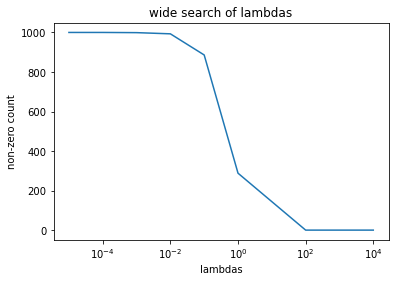

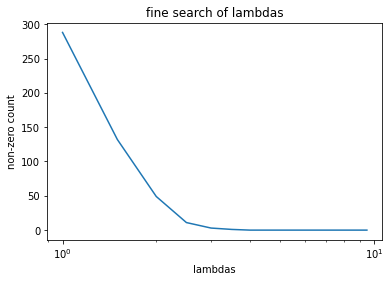

' \nThe top plot shows the number of non-zeros vs the lambda values.\nAs shown in the plot, the number of non-zero values takes a big decrease when going from 10e-1 \nto 10e0, ie when the parameter lambda goes from 1 to 10 the number of zeros increases significantly!\n\nTaking a deeper look, in the second graph we can actually see the smooth curve \non the numbers in the range from 1-10! \n'

In [48]:
# 6 - Lasso Sparsity

from sklearn.linear_model import Lasso

def lams(lambdas,a):
    for i in range(len(lambdas)):
        model = Lasso(alpha=lambdas[i]).fit(X,y) # fit with current iteration of lamda value
        w_hat_lambda.append(model.coef_) # grab the parameters / weights

    non_zeros_per_lambda = [] # list to hold number of nonzeros per lambda
    for i in range(len(w_hat_lambda)):
        non_zeros_per_lambda.append(np.count_nonzero(w_hat_lambda[i])) #use numpy function count nonzero 

    # plot
    x_range = np.arange(0, i) # generate the x axis of length i 
    plt.plot(lambdas, non_zeros_per_lambda)
    plt.xscale('log')
    plt.xlabel('lambdas')
    plt.ylabel('non-zero count')
    plt.title('wide search of lambdas') if a else plt.title('fine search of lambdas')
    plt.show()

lambda_1 = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e1, 10e2, 10e3]
w_hat_lambda = [] # list of lists that hold weights per iteration
lams(lambda_1,True) # pass the lambas and a bool to indicate which plot it is for title 

lambda_2 = np.arange(1,10,.5) # use arange to get a fine range 1-10 in steps of 0.5
w_hat_lambda = []
lams(lambda_2,False)
''' 
The top plot shows the number of non-zeros vs the lambda values.
As shown in the plot, the number of non-zero values takes a big decrease when going from 10e-1 
to 10e0, ie when the parameter lambda goes from 1 to 10 the number of zeros increases significantly!

Taking a deeper look, in the second graph we can actually see the smooth curve 
on the numbers in the range from 1-10! 
'''
